In [1]:
import geomalgo as ga
%load_ext Cython
%load_ext wurlitzer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A
    
A.x = 1
A.y = 2

printf("A: (%.0f, %.0f)\n", A.x, A.y)

A: (1, 2)


A: Point2D(1.0, 2.0)


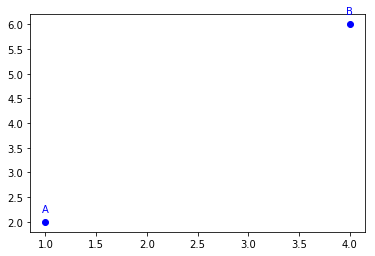

In [4]:
A = ga.Point2D(1, 2, name='A')
B = ga.Point2D(4, 6, name='B')
print('A:', A)
A.plot()
B.plot()

In [5]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.Point2D A
    ga.CPoint2D* ptr

A = ga.Point2D(1, 2)

ptr = A.cpoint2d
printf("(%.0f, %.0f)\n", ptr.x, ptr.y)

(1, 2)
